### Importing libraries ###

In [341]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Checking Working Directory 

In [342]:
import os
print(os.getcwd())

C:\Users\Obinna J. Duruiheme\RFM Analysis\Notebooks


In [343]:
print(os.listdir())

['.ipynb_checkpoints', 'RFM Analysis Solution.ipynb']


### Loading Data

In [344]:
df = pd.read_csv('../Data/bank_data.csv')

### Dataset Exploration 

In [345]:
df.shape

(1041614, 9)

In [346]:
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0


In [347]:
df.tail(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1041613,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [349]:
df.nunique()

TransactionID              1041614
CustomerID                  879358
CustomerDOB                  17233
CustGender                       3
CustLocation                  9275
CustAccountBalance          160723
TransactionDate                 55
TransactionTime              81855
TransactionAmount (INR)      92391
dtype: int64

In [350]:
print(df['CustGender'].unique())

['F' 'M' 'T']


In [351]:
print(df['CustGender'].value_counts())

M    760978
F    280635
T         1
Name: CustGender, dtype: int64


In [352]:
print(df['TransactionDate'].unique())

['2/8/16' '1/8/16' '3/8/16' '5/8/16' '4/8/16' '6/8/16' '9/8/16' '8/8/16'
 '12/8/16' '7/8/16' '21/10/16' '16/10/16' '10/8/16' '14/8/16' '17/8/16'
 '21/8/16' '19/8/16' '24/8/16' '22/8/16' '29/8/16' '31/8/16' '22/9/16'
 '23/9/16' '13/8/16' '25/8/16' '28/8/16' '15/8/16' '27/8/16' '20/8/16'
 '23/8/16' '30/8/16' '11/8/16' '16/8/16' '26/8/16' '27/9/16' '18/8/16'
 '25/9/16' '26/9/16' '30/9/16' '3/9/16' '2/9/16' '1/9/16' '6/9/16'
 '5/9/16' '4/9/16' '9/9/16' '8/9/16' '7/9/16' '12/9/16' '11/9/16'
 '10/9/16' '15/9/16' '14/9/16' '13/9/16' '18/9/16']


In [353]:
print(df['TransactionDate'].value_counts())

7/8/16      27084
13/8/16     26738
4/9/16      26420
6/8/16      26416
3/9/16      26292
10/9/16     25628
14/8/16     25407
11/9/16     25355
15/8/16     24020
21/8/16     22833
2/9/16      22718
12/8/16     22277
1/9/16      22179
11/8/16     21674
9/8/16      21673
8/9/16      21648
10/8/16     21457
9/9/16      21444
27/8/16     21349
20/8/16     21188
5/9/16      21116
7/9/16      20999
17/8/16     20960
5/8/16      20949
28/8/16     20944
8/8/16      20883
2/8/16      20787
12/9/16     20611
4/8/16      20535
13/9/16     20506
3/8/16      20446
16/8/16     20278
1/8/16      20277
14/9/16     19845
15/9/16     19610
31/8/16     19586
6/9/16      19510
18/8/16     19338
19/8/16     18559
22/8/16     18441
25/8/16     18424
24/8/16     17893
26/8/16     17615
30/8/16     17273
23/8/16     17239
29/8/16     16700
18/9/16     14622
26/9/16     12376
25/9/16      8127
27/9/16      7401
22/9/16      6925
21/10/16     3641
23/9/16      3460
30/9/16      1935
16/10/16        3
Name: Tran

In [354]:
df.describe(include = 'all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [355]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [356]:
corr = (df.corr())
print(corr)

                         CustAccountBalance  TransactionTime  \
CustAccountBalance                 1.000000        -0.004012   
TransactionTime                   -0.004012         1.000000   
TransactionAmount (INR)            0.062692         0.008296   

                         TransactionAmount (INR)  
CustAccountBalance                      0.062692  
TransactionTime                         0.008296  
TransactionAmount (INR)                 1.000000  


### Data Cleaning 

In [357]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [358]:
# converting TransactionDate and CustomerDOB to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y')
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')                          

In [359]:
df['TransactionDate'].head(3)

0   2016-08-02
1   2016-08-02
2   2016-08-02
Name: TransactionDate, dtype: datetime64[ns]

In [360]:
df['TransactionDate'].unique()

array(['2016-08-02T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2016-08-09T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-10-21T00:00:00.000000000', '2016-10-16T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-14T00:00:00.000000000',
       '2016-08-17T00:00:00.000000000', '2016-08-21T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-08-24T00:00:00.000000000',
       '2016-08-22T00:00:00.000000000', '2016-08-29T00:00:00.000000000',
       '2016-08-31T00:00:00.000000000', '2016-09-22T00:00:00.000000000',
       '2016-09-23T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-25T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-08-27

In [361]:
# Display in dd/mm/yyyy format
# df['TransactionDate'] = df['TransactionDate'].dt.strftime('%d/%m/%Y')
# df['TransactionDate'].head(3)

In [362]:
# Check how many entries were converted to NaT
print(df['CustomerDOB'].isnull().sum())

0


In [363]:
df['CustomerDOB'].head()

0   1994-10-01
1   2057-04-04
2   1996-11-26
3   2073-09-14
4   1988-03-24
Name: CustomerDOB, dtype: datetime64[ns]

In [364]:
df['CustomerDOB'].unique()

array(['1994-10-01T00:00:00.000000000', '2057-04-04T00:00:00.000000000',
       '1996-11-26T00:00:00.000000000', ...,
       '2065-07-18T00:00:00.000000000', '2042-05-15T00:00:00.000000000',
       '2044-10-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [365]:
# Display in dd/mm/yyyy format
# df['CustomerDOB'] = df['CustomerDOB'].dt.strftime('%d/%m/%Y')
# df['CustomerDOB'].head(3)

In [366]:
df['CustomerDOB'].unique()

array(['1994-10-01T00:00:00.000000000', '2057-04-04T00:00:00.000000000',
       '1996-11-26T00:00:00.000000000', ...,
       '2065-07-18T00:00:00.000000000', '2042-05-15T00:00:00.000000000',
       '2044-10-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [367]:
# Calculating customers age and creating a new column for it
def age_calculation(df):
    df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
    return df

In [368]:
# Load the dataset
# df = pd.read_csv('../Data/bank_data.csv')

# Call the function
df = age_calculation(df)

# Display the first three rows
# print(df.head(3))
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20


In [369]:
# observing the wrong date of birth with negative sign
df[df['Age'] <= 0]['CustomerDOB']

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [370]:
# writing a function to correct negative age by adjusting date of birth
def Rewrite_year(date):
    if date.year > 2016:
        date = date.replace(year = date.year -100)
    return date

In [371]:
df['CustomerDOB'] = df['CustomerDOB'].apply(Rewrite_year)

In [372]:
# Load the dataset
# df = pd.read_csv('../Data/bank_data.csv')

# Call the function
df = age_calculation(df)

# Display the first three rows
# print(df.head(3))
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


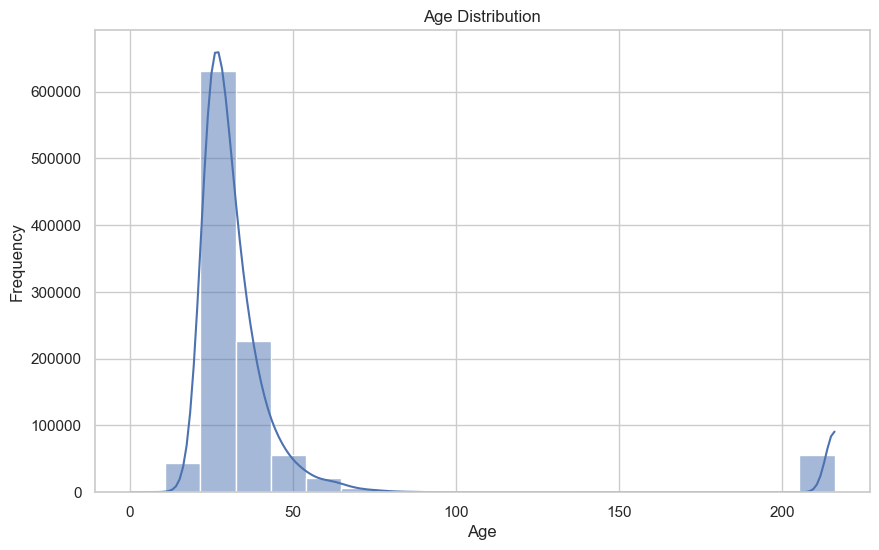

In [373]:
# observing Age distribution using histogram plot

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)  # Use bins to adjust the granularity
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [374]:
df[df['Age']> 100] ['CustomerDOB'].unique()

array(['1800-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [375]:
# Fixing Age outliers 

def age_outlier_correction(df):
    DOB_threshold = 1900
    Age_outliers = df[df['CustomerDOB'].dt.year < DOB_threshold].index
    mean_DOB = df[~df.index.isin(Age_outliers)]['CustomerDOB'].mean()
    df.loc[Age_outliers, 'CustomerDOB'] = mean_DOB
    return df

In [376]:
df = age_outlier_correction(df)
df = age_calculation(df)

In [377]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


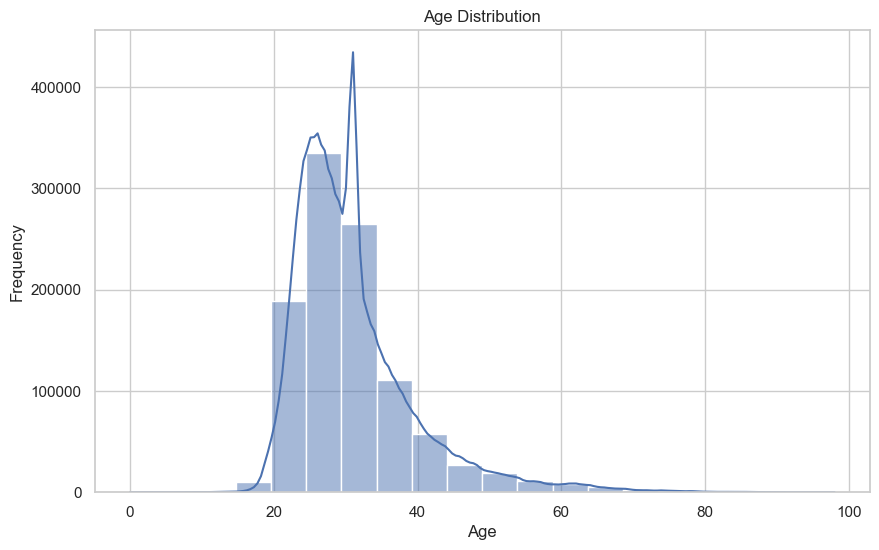

In [378]:
# observing Age distribution using histogram plot

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)  # Use bins to adjust the granularity
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

 Gender Column

In [379]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [380]:
# Replacing with T with M

df['CustGender'] = df['CustGender'].replace('T', 'M')
df['CustGender'].value_counts()

M    760979
F    280635
Name: CustGender, dtype: int64

Location Column

In [381]:
df['CustLocation'].unique()

array(['JAMSHEDPUR', 'JHAJJAR', 'MUMBAI', ..., 'KARANJIA',
       'NR HERITAGE FRESH HYDERABAD', 'IMPERIA THANE WEST'], dtype=object)

In [382]:
df['CustLocation'].value_counts()

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

Account balance Column

In [383]:
df['CustAccountBalance'].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

Transaction amount Column

In [384]:
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

820

In [385]:
df.drop(df[df['TransactionAmount (INR)'] == 0].index.tolist(), axis = 0, inplace = True )

In [386]:
df['CustAccountBalance'].sort_values(ascending = True)

620116            0.0
665191            0.0
931320            0.0
741632            0.0
363443            0.0
             ...     
873636    115035495.1
821032    115035495.1
40727     115035495.1
994478    115035495.1
996102    115035495.1
Name: CustAccountBalance, Length: 1040794, dtype: float64

In [387]:
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

0

Viewing cleaned data for Analysis

In [388]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


## Exploratory Data Analysis ##

In [389]:
df['CustomerID'].nunique()

878763

In [390]:
df.shape

(1040794, 10)

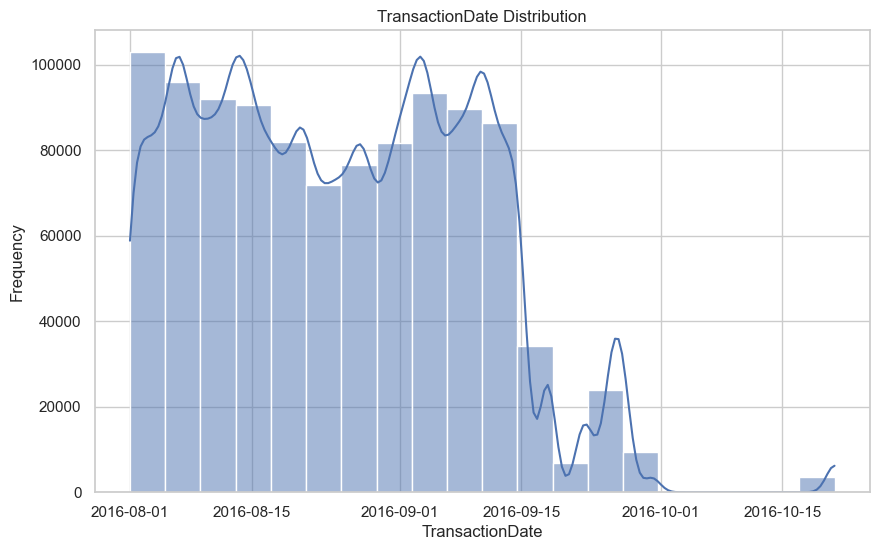

In [391]:
# observing TransactionDate distribution using histogram plot

plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionDate'], bins=20, kde=True)  # Use bins to adjust the granularity
plt.title('TransactionDate Distribution')
plt.xlabel('TransactionDate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

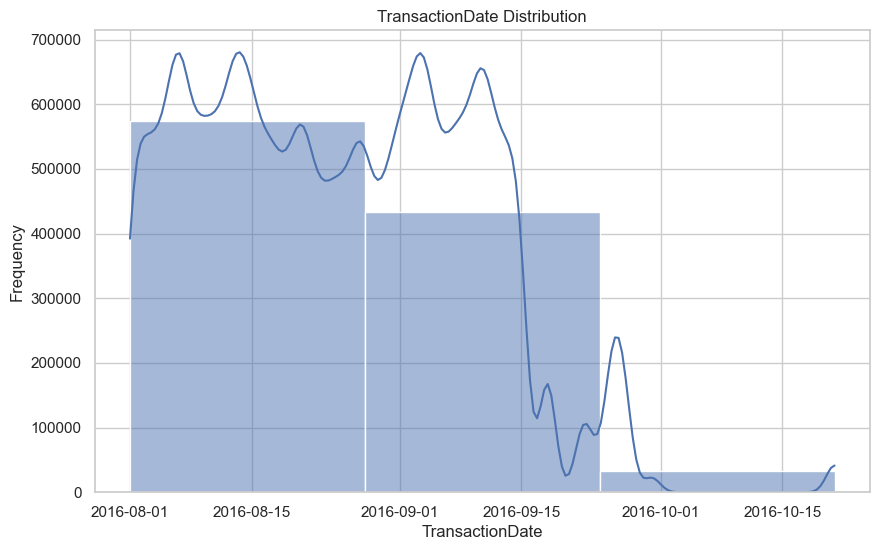

In [392]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionDate'], bins=3, kde=True)  # Use bins to adjust the granularity
plt.title('TransactionDate Distribution')
plt.xlabel('TransactionDate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Creating Piechart for Gender count

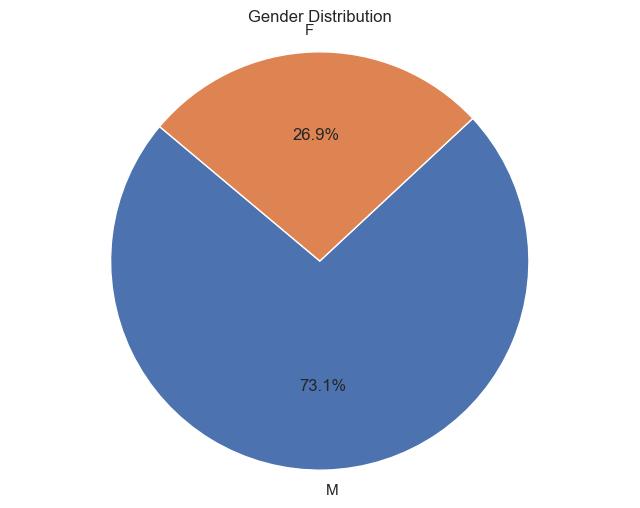

In [393]:
gender_counts = df['CustGender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

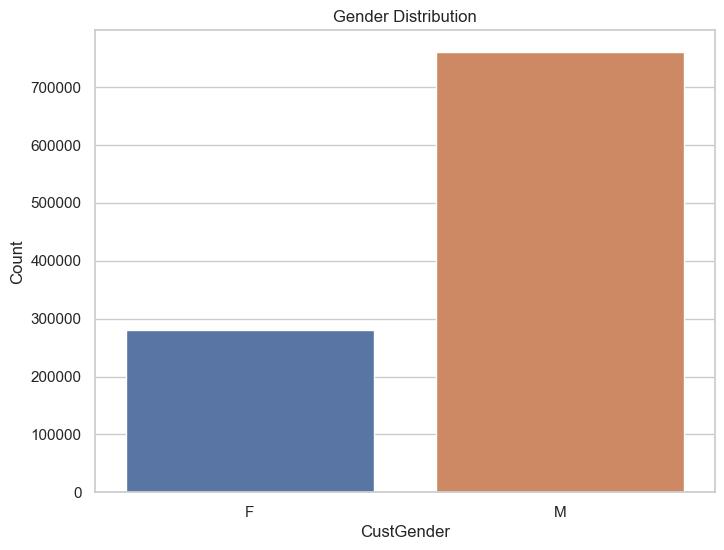

In [394]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CustGender')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

Plots for Gender and Location

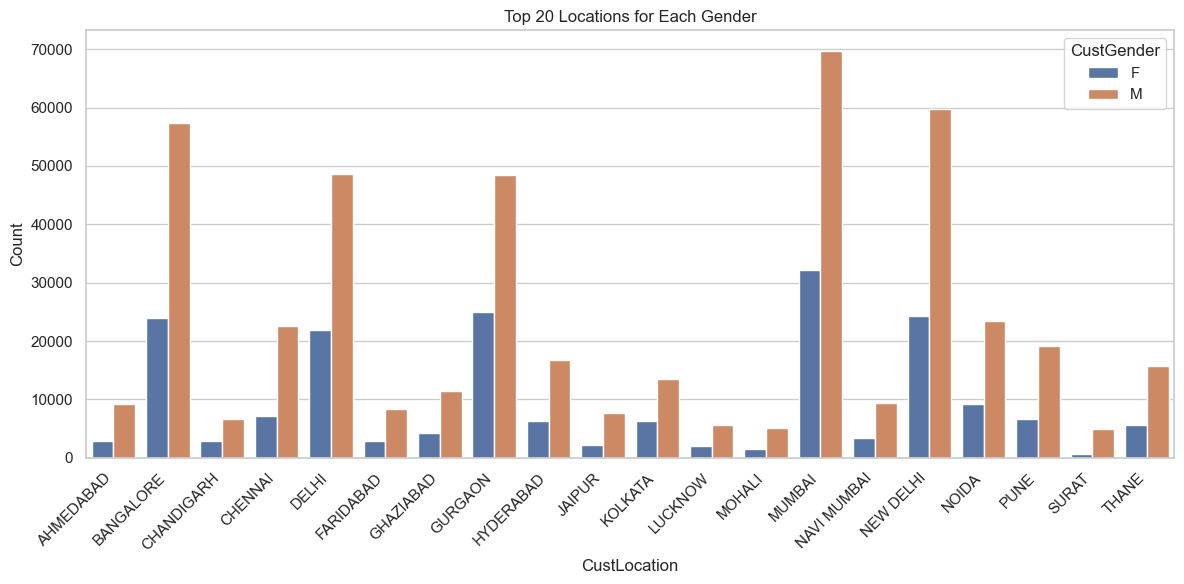

In [395]:
# Counting occurrences of each location by gender
location_counts = df.groupby(['CustLocation', 'CustGender']).size().reset_index(name='Count')

# Getting the top 20 locations based on total counts
top_locations = location_counts.groupby('CustLocation')['Count'].sum().nlargest(20).index
top_location_counts = location_counts[location_counts['CustLocation'].isin(top_locations)]

# Plotting the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_location_counts, x='CustLocation', y='Count', hue='CustGender')
plt.title('Top 20 Locations for Each Gender')
plt.ylabel('Count')
plt.xlabel('CustLocation')

# Adjusting x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate and align to the right
plt.legend(title='CustGender')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

Plots for Gender Vs Account Balance

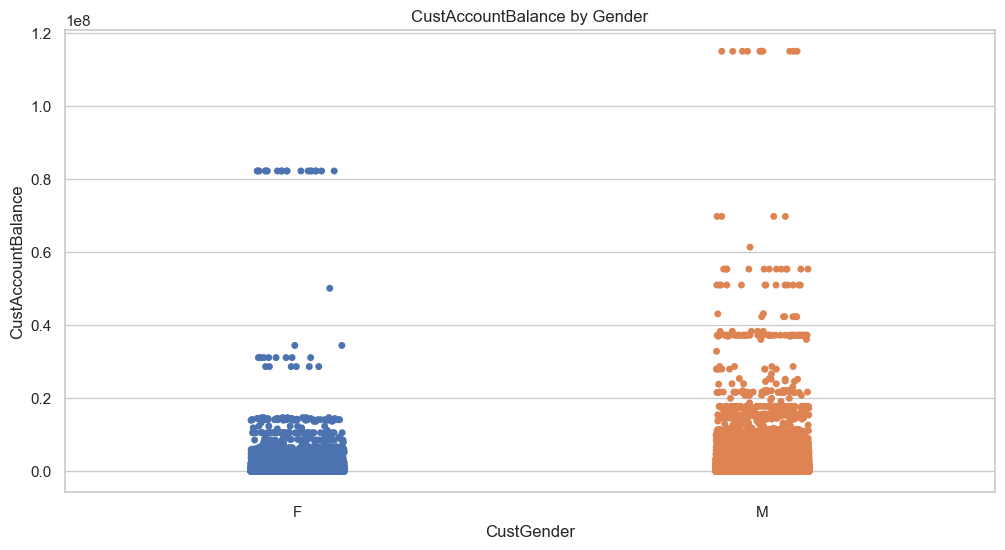

In [396]:
# Strip Plot

plt.figure(figsize=(12, 6))
sns.stripplot(x='CustGender', y='CustAccountBalance', data=df, jitter=True)
plt.title('CustAccountBalance by Gender')
plt.show()

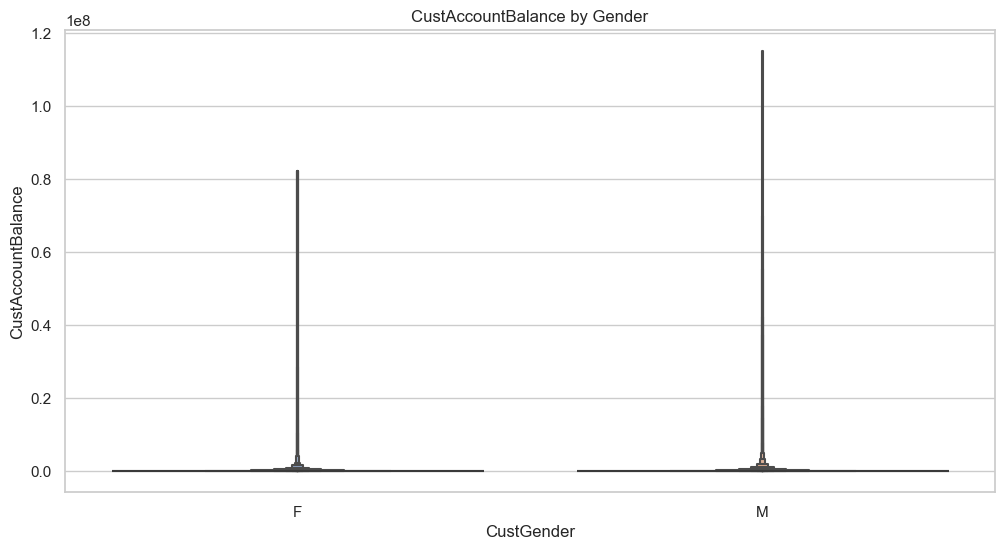

In [397]:
# Boxenplot

plt.figure(figsize=(12, 6))
sns.boxenplot(x='CustGender', y='CustAccountBalance', data=df)
plt.title('CustAccountBalance by Gender')
plt.show()

Plots for Gender Vs Transaction Amount

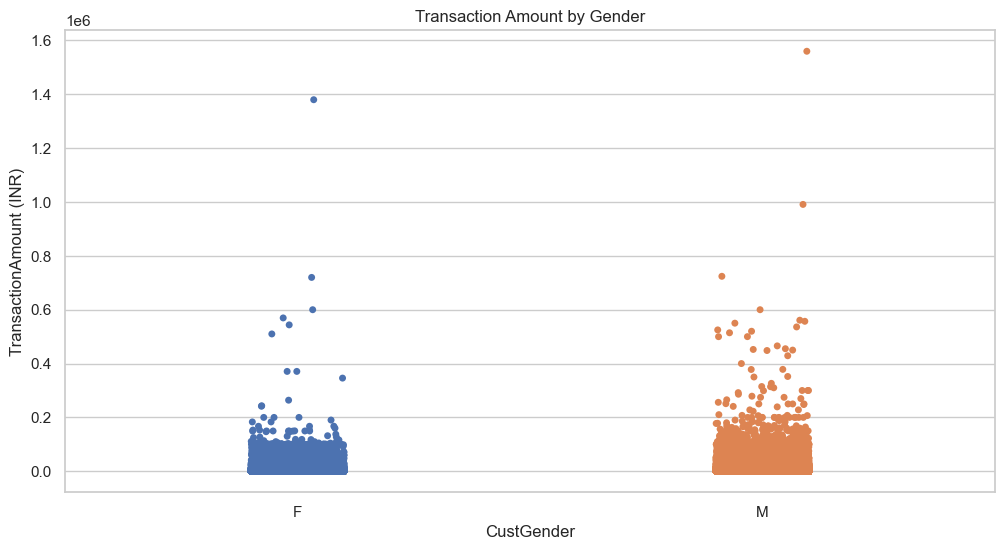

In [398]:
# Strip plot

plt.figure(figsize=(12, 6))
sns.stripplot(x='CustGender', y='TransactionAmount (INR)', data=df, jitter=True)
plt.title('Transaction Amount by Gender')
plt.show()

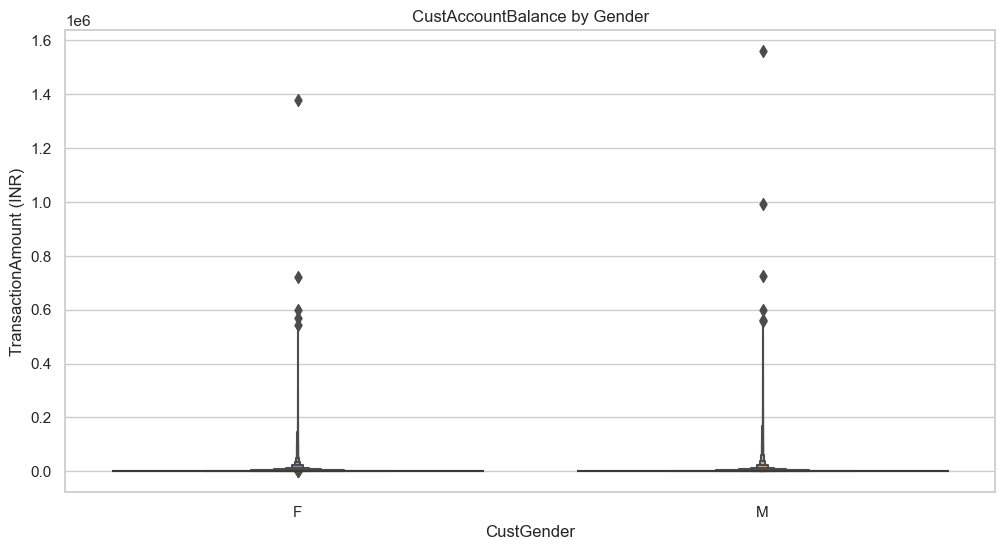

In [399]:
# Boxenplot

plt.figure(figsize=(12, 6))
sns.boxenplot(x='CustGender', y='TransactionAmount (INR)', data=df)
plt.title('CustAccountBalance by Gender')
plt.show()

Plots for Gender Vs Age

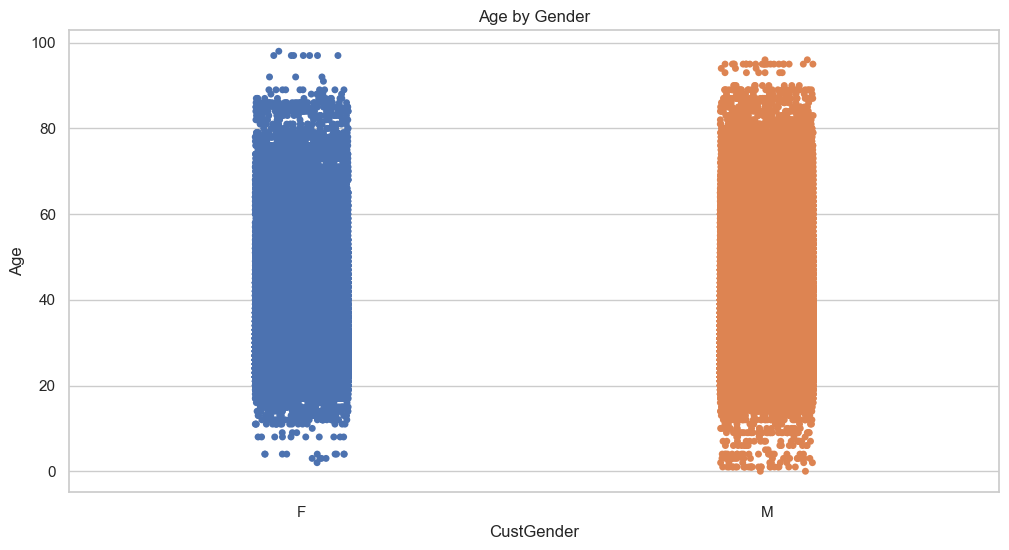

In [400]:
# Strip plot

plt.figure(figsize=(12, 6))
sns.stripplot(x='CustGender', y='Age', data=df, jitter=True)
plt.title('Age by Gender')
plt.show()

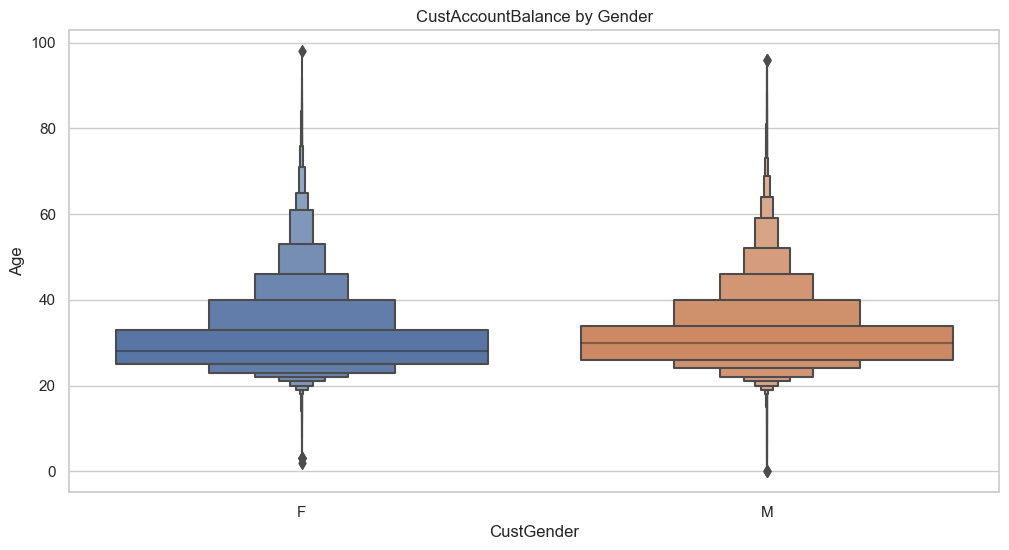

In [401]:
# Boxenplot

plt.figure(figsize=(12, 6))
sns.boxenplot(x='CustGender', y='Age', data=df)
plt.title('CustAccountBalance by Gender')
plt.show()

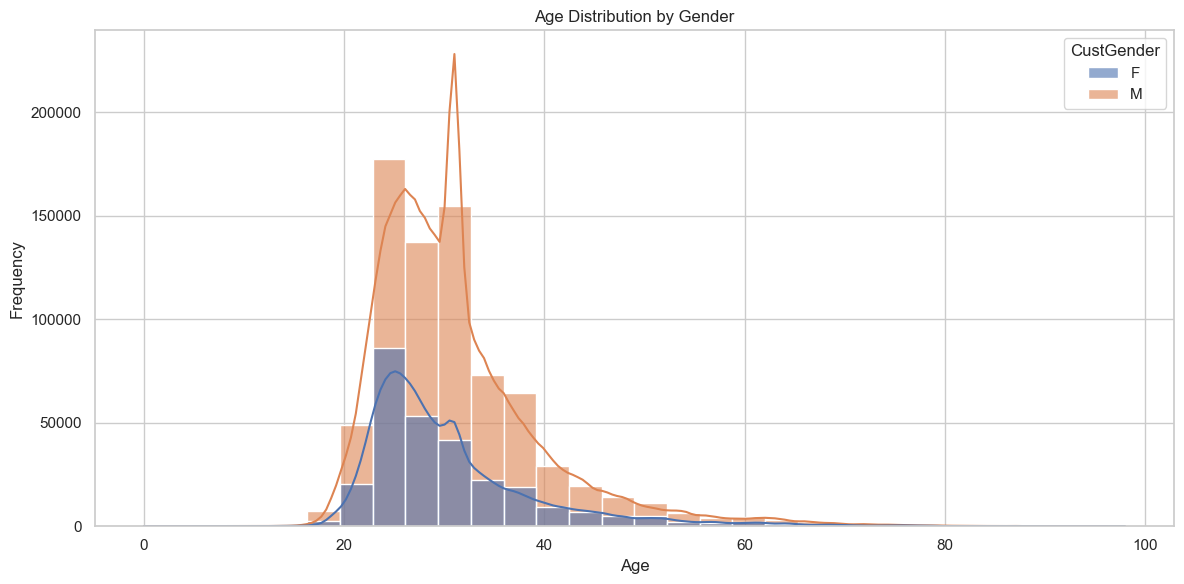

In [402]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='CustGender', bins=30, kde=True, alpha=0.6)
plt.title('Age Distribution by Gender')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

Plot of Gender vs Transaction Date 

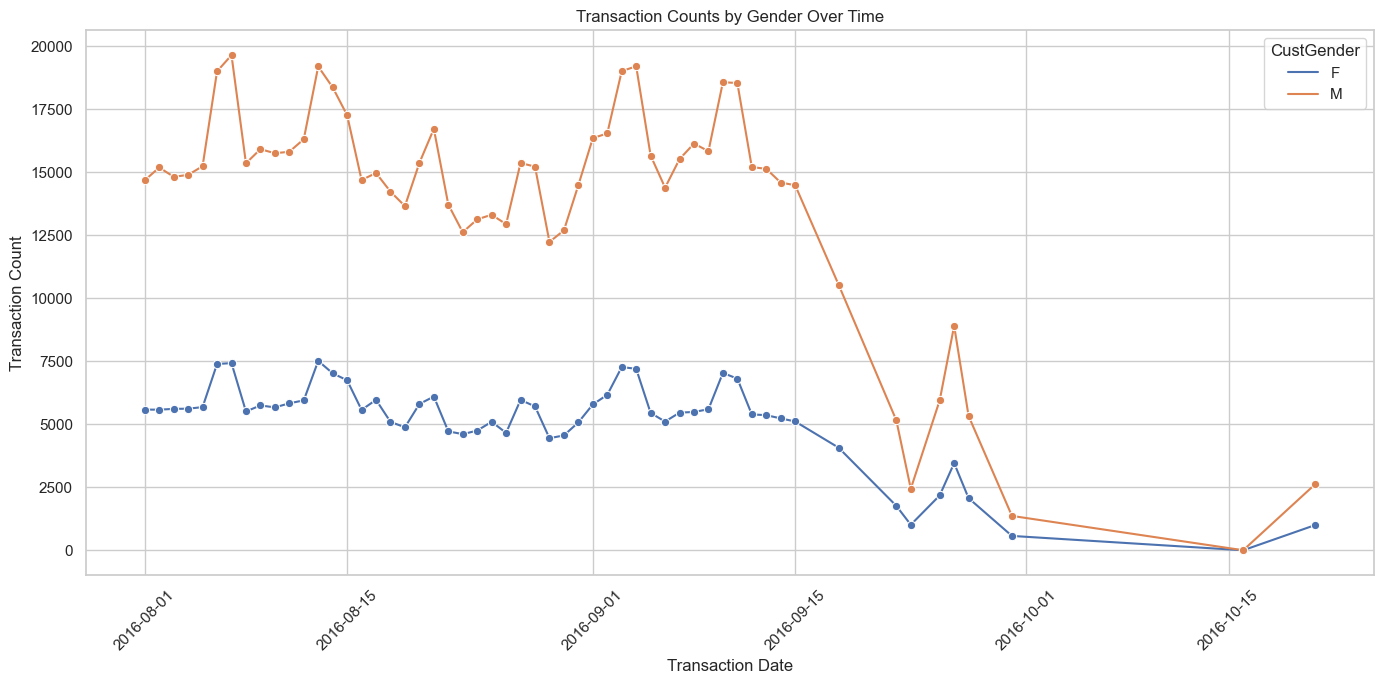

In [403]:
# Convert TransactionDate to datetime which was done earlier
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Grouping by date and gender, counting transactions
df['TransactionDate'] = df['TransactionDate'].dt.date  # Keep only the date part
transaction_counts = df.groupby(['TransactionDate', 'CustGender']).size().reset_index(name='Count')

# Plotting the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=transaction_counts, x='TransactionDate', y='Count', hue='CustGender', marker='o')
plt.title('Transaction Counts by Gender Over Time')
plt.ylabel('Transaction Count')
plt.xlabel('Transaction Date')
plt.xticks(rotation=45)
plt.legend(title='CustGender')
plt.tight_layout()
plt.show()

Plot of Gender vs Customer Year of Birth 

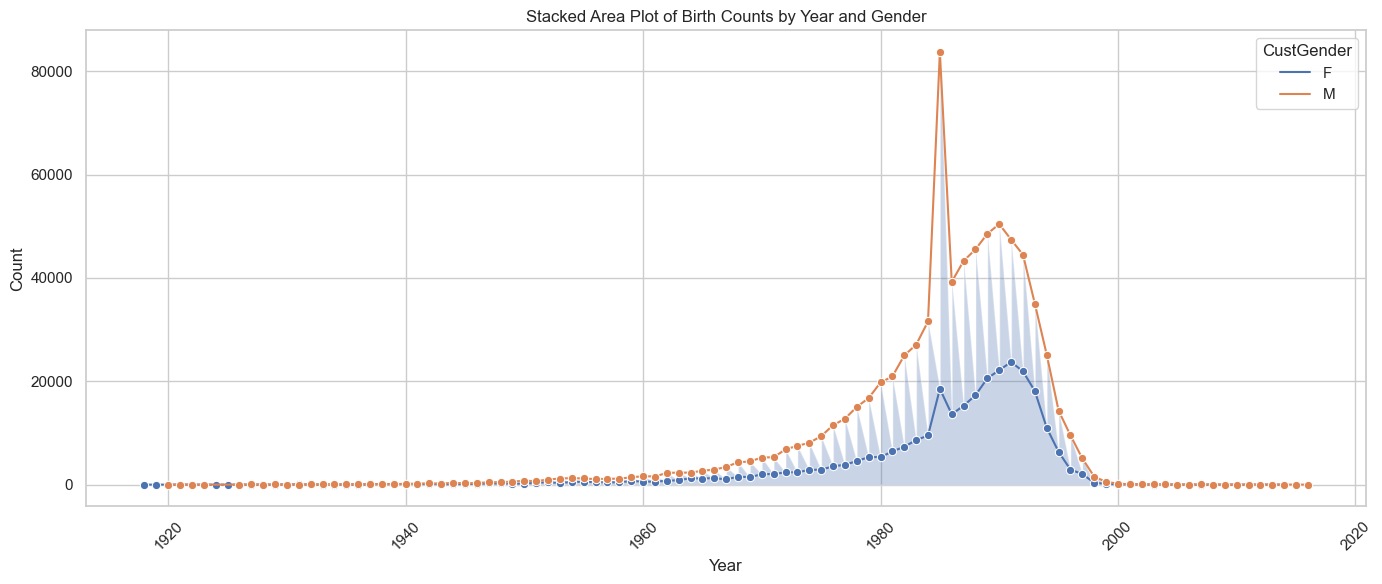

In [404]:
#Stacked Area Plot

df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Extract the year from CustomerDOB
df['Year'] = df['CustomerDOB'].dt.year

# Grouping by year and gender
yearly_counts = df.groupby(['Year', 'CustGender']).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_counts, x='Year', y='Count', hue='CustGender', estimator='sum', marker='o', ci=None)
plt.fill_between(yearly_counts['Year'], yearly_counts['Count'], alpha=0.3)
plt.title('Stacked Area Plot of Birth Counts by Year and Gender')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

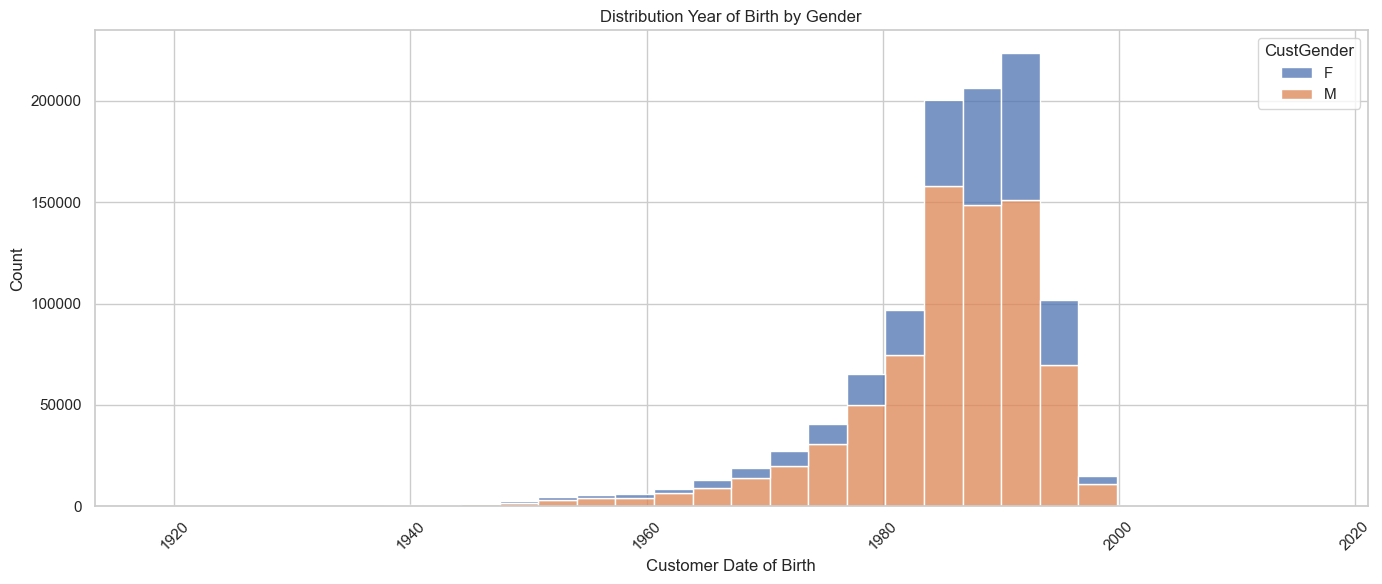

In [405]:
# Hist plot

# CustomerDOB to datetime 
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Plotting the count of birth dates by gender
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='CustomerDOB', hue='CustGender', multiple='stack', bins=30, kde=False)
plt.title('Distribution Year of Birth by Gender')
plt.ylabel('Count')
plt.xlabel('Customer Date of Birth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

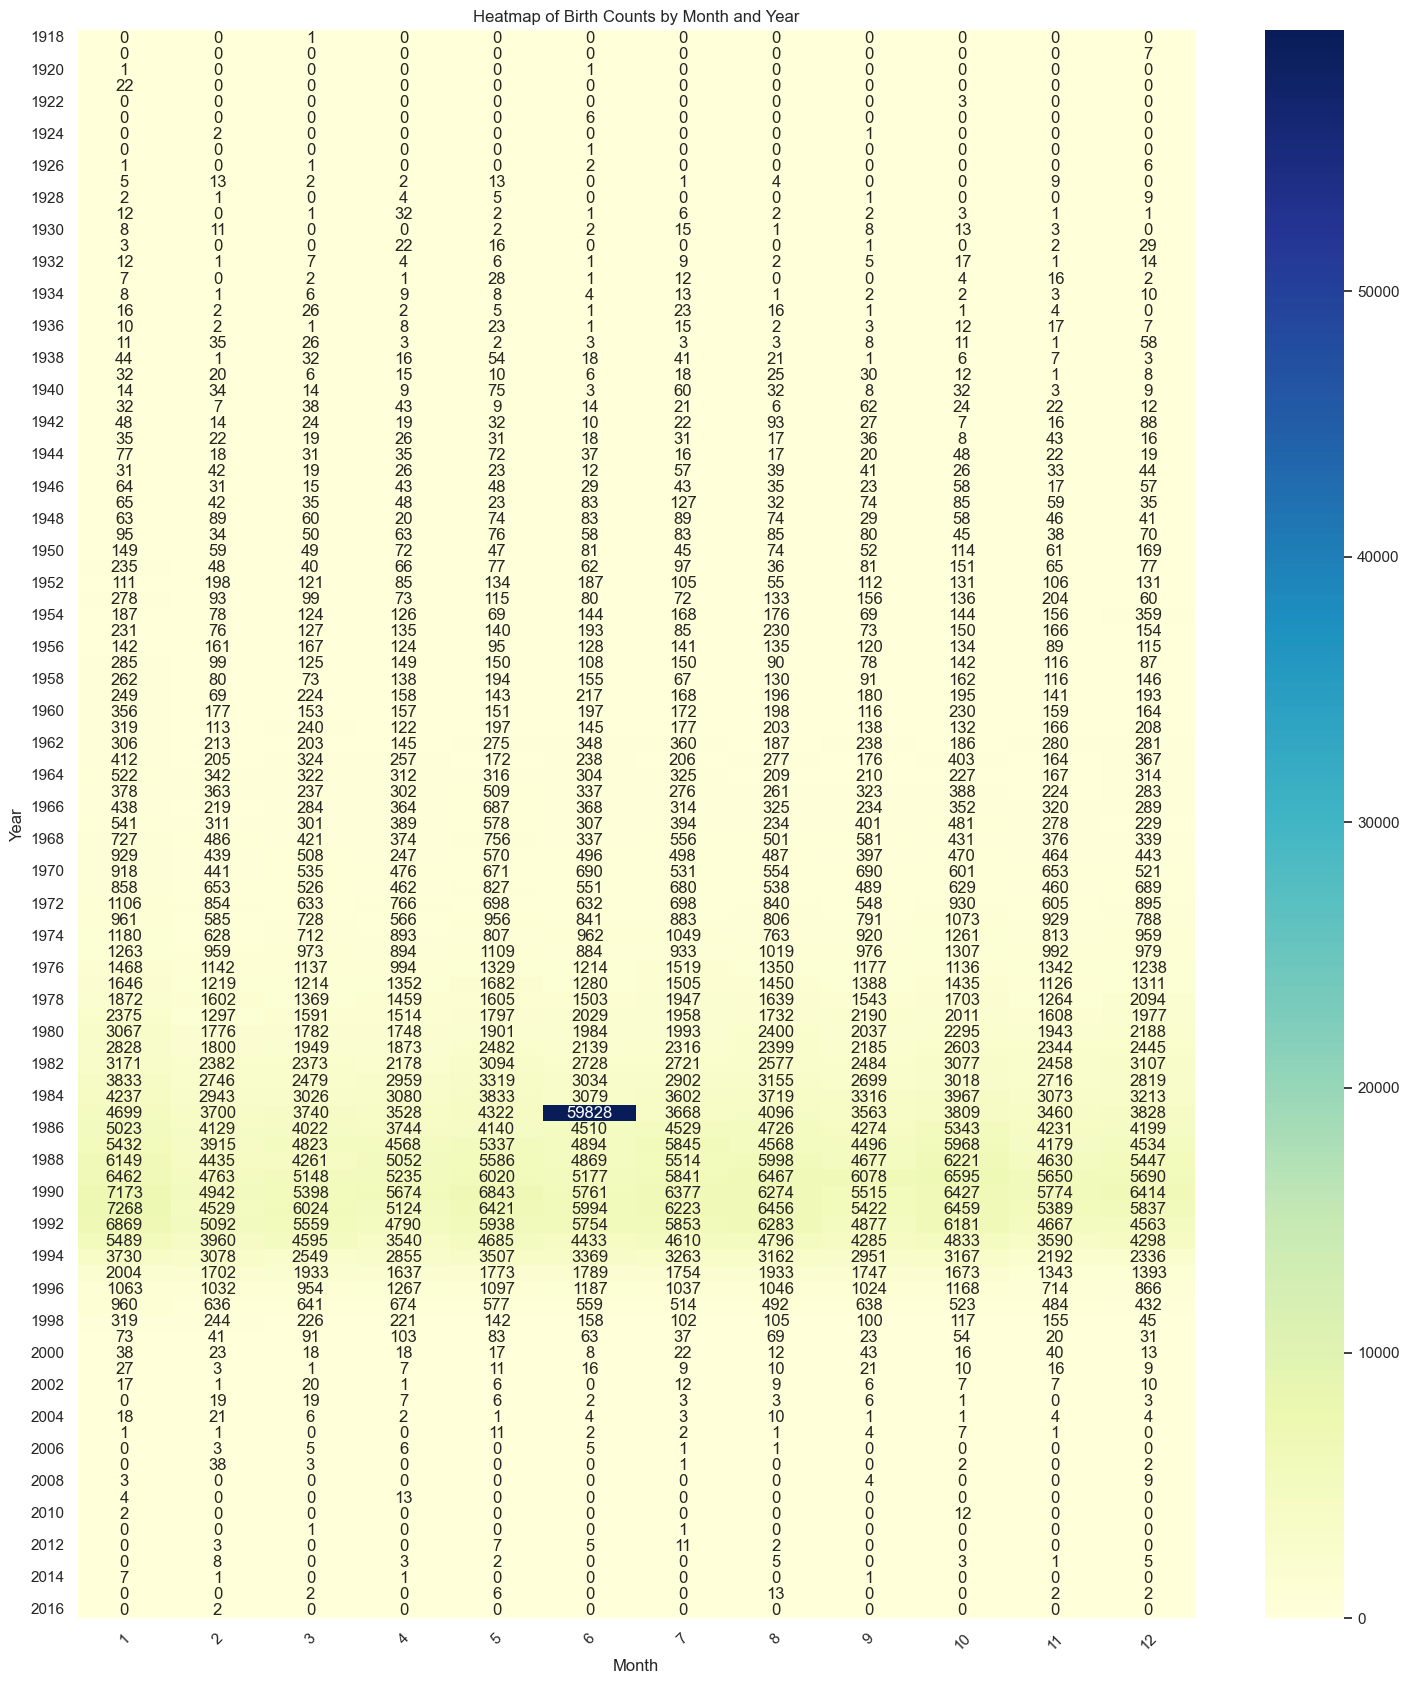

In [406]:
# Extracting month and year from CustomerDOB

df['Month'] = df['CustomerDOB'].dt.month
df['Year'] = df['CustomerDOB'].dt.year

# Creating a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Year', columns='Month', values='CustGender', aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 17))
sns.heatmap(data=heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Birth Counts by Month and Year')
plt.ylabel('Year')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

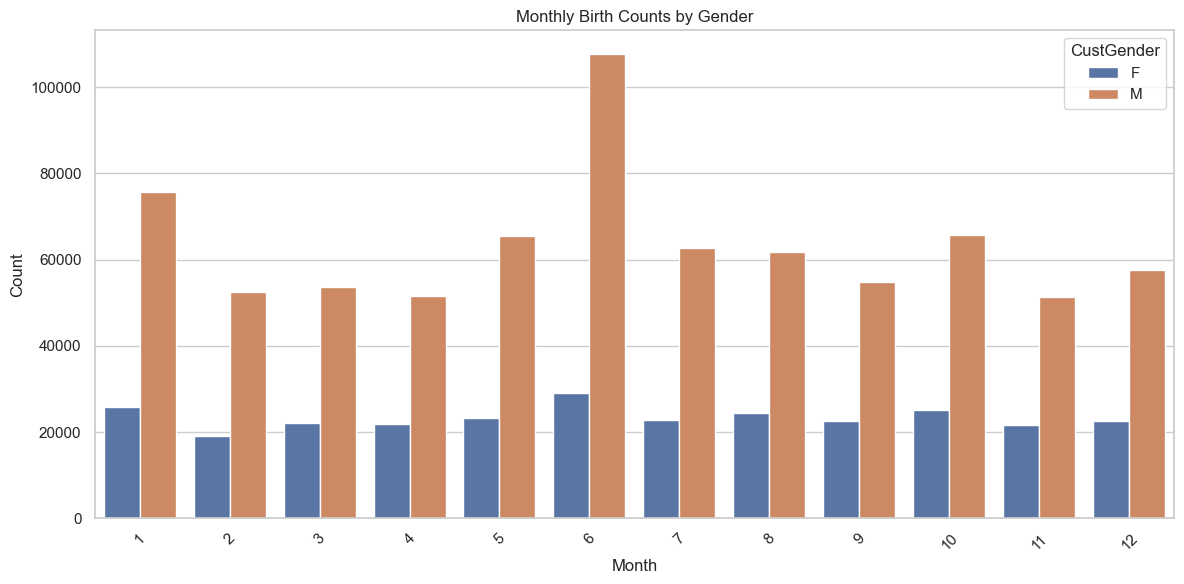

In [407]:
monthly_counts = df.groupby(['Month', 'CustGender']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_counts, x='Month', y='Count', hue='CustGender')
plt.title('Monthly Birth Counts by Gender')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## RFM ANALYSIS ##

In [408]:
# Reviewing Dataframe

df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,Year,Month
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,1994,10
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,1957,4
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,1996,11
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,1973,9
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,1988,3


#### RECENCY ####
Here we re trying to find out how recent a particular customer transacted with the bank

In [409]:
day = df['TransactionDate'].max()
day

datetime.date(2016, 10, 21)

In [410]:
recency = df.groupby(['CustomerID']).agg({'TransactionDate': lambda x: (day - x.max()).days + 1}).reset_index().rename(columns={'TransactionDate': 'Recency'})

In [411]:
recency

,CustomerID,Recency
0,C1010011,26
1,C1010012,69
2,C1010014,76
3,C1010018,37
4,C1010024,65
...,...,...
878758,C9099836,76
878759,C9099877,37
878760,C9099919,65
878761,C9099941,55


#### FREQUENCY ####

This is the frequency of transactions each customer made; which is calcualted by counting the number of transactions per CustomerID

In [412]:
# frequency = df.drop_duplicates(subset = 'TransactionID').groupby(['CustomerID'])[['TransactionID']].count()

In [413]:
# Calculate frequency of transactions
frequency = df.groupby(['CustomerID']).size().reset_index(name='Frequency').reset_index()

# Print the frequency DataFrame
print(frequency)

         index CustomerID  Frequency
0            0   C1010011          2
1            1   C1010012          1
2            2   C1010014          2
3            3   C1010018          1
4            4   C1010024          1
...        ...        ...        ...
878758  878758   C9099836          1
878759  878759   C9099877          1
878760  878760   C9099919          1
878761  878761   C9099941          1
878762  878762   C9099956          1

[878763 rows x 3 columns]


#### MONETARY ####

The monetary value of transactions for each customer is the sum transaction amounts

In [414]:
# Calculate monetary value of transactions
monetary = df.groupby(['CustomerID']).agg({'TransactionAmount (INR)': 'sum'}).reset_index()

# Rename the column for clarity
monetary.rename(columns={'TransactionAmount (INR)': 'Monetary'}, inplace=True)

# Print the monetary DataFrame
print(monetary)

       CustomerID  Monetary
0        C1010011    5106.0
1        C1010012    1499.0
2        C1010014    1455.0
3        C1010018      30.0
4        C1010024    5000.0
...           ...       ...
878758   C9099836     691.0
878759   C9099877     222.0
878760   C9099919     126.0
878761   C9099941      50.0
878762   C9099956     855.0

[878763 rows x 2 columns]


#### Creating RFM Table ####


In [415]:
# Merge all into RFM table
rfm_table = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

# Print the RFM table
print(rfm_table)

       CustomerID  Recency   index  Frequency  Monetary
0        C1010011       26       0          2    5106.0
1        C1010012       69       1          1    1499.0
2        C1010014       76       2          2    1455.0
3        C1010018       37       3          1      30.0
4        C1010024       65       4          1    5000.0
...           ...      ...     ...        ...       ...
878758   C9099836       76  878758          1     691.0
878759   C9099877       37  878759          1     222.0
878760   C9099919       65  878760          1     126.0
878761   C9099941       55  878761          1      50.0
878762   C9099956       27  878762          1     855.0

[878763 rows x 5 columns]


In [416]:

# Get unique values in the Frequency column
unique_frequencies = rfm_table['Recency'].unique()

# Print the unique values
print(unique_frequencies)

[26 69 76 37 65 54 79 56 57 74 45 50 42 70 66 78 55 77 73 41 44 82 68 51
 72 53 47 71 39 49 38 64 34 46 43 67 48 27 25 58 80 30 29 62 40 81 60 52
 59 61 22 63  1 75  6]


In [417]:
# Get unique values in the Frequency column
unique_frequencies = rfm_table['Frequency'].unique()

# Print the unique values
print(unique_frequencies)

[2 1 3 4 6 5]


In [418]:
# Get unique values in the Frequency column
unique_frequencies = rfm_table['Monetary'].unique()

# Print the unique values
print(unique_frequencies)

[ 5106.    1499.    1455.   ... 17754.     856.75   707.96]


In [419]:
# can also be done this way; 

# rfm_table = pd.concat([recency.set_index('CustomerID'), 
#                         frequency.set_index('CustomerID'), 
#                         monetary.set_index('CustomerID')], axis=1).reset_index()

# # Print the RFM table
# print(rfm_table)

#### Visualizing RFM Table ####

In [420]:
# Checking Correlation of RFM Table

rfm_table.corr()

,Recency,index,Frequency,Monetary
Recency,1.000000,0.000616,-0.223293,-0.020675
index,0.000616,1.000000,-0.000490,0.001425
Frequency,-0.223293,-0.000490,1.000000,0.097491
Monetary,-0.020675,0.001425,0.097491,1.000000


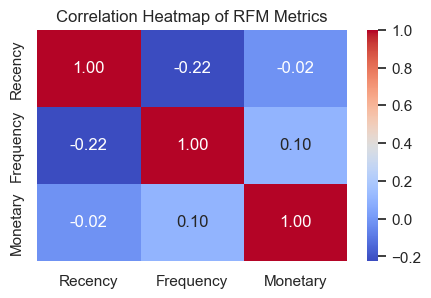

In [421]:
# Heatmap of Correlation

plt.figure(figsize=(5, 3))
sns.heatmap(rfm_table[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of RFM Metrics')
plt.show()

<Figure size 500x300 with 0 Axes>

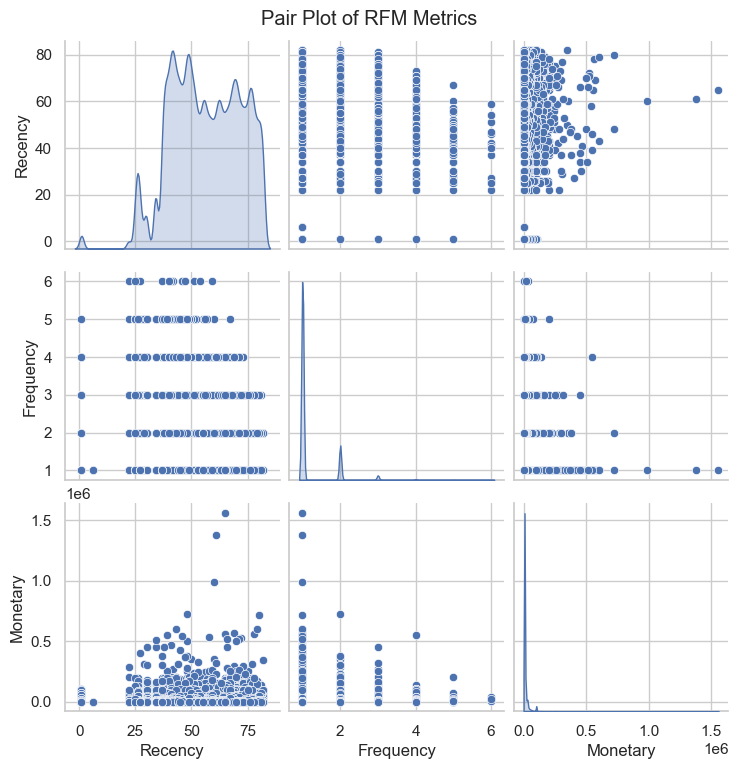

In [422]:
# Pair Plot

plt.figure(figsize=(5, 3))
sns.pairplot(rfm_table[['Recency', 'Frequency', 'Monetary']], diag_kind='kde', markers='o')
plt.suptitle('Pair Plot of RFM Metrics', y=1.02)
plt.show()

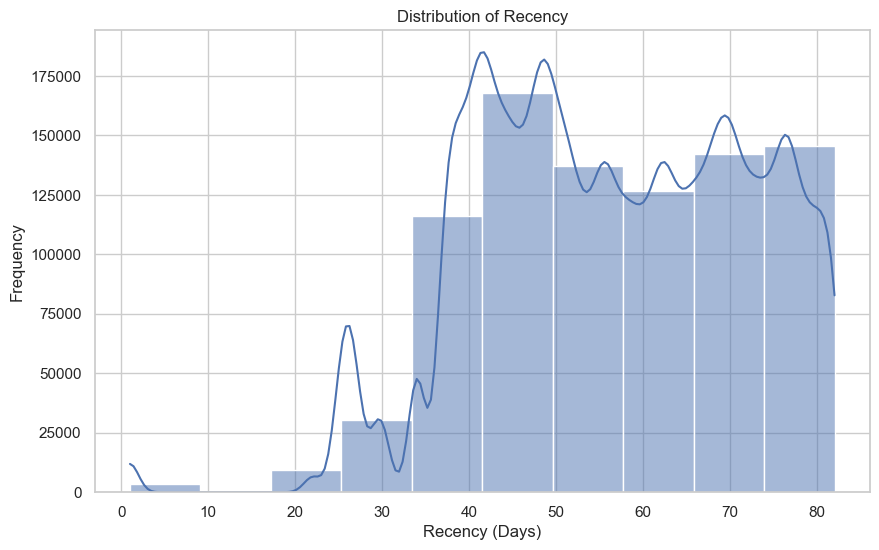

In [423]:
# Set the plot style
sns.set(style="whitegrid")

#Distribution of Recency

plt.figure(figsize=(10, 6))
sns.histplot(rfm_table['Recency'], bins=10, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()

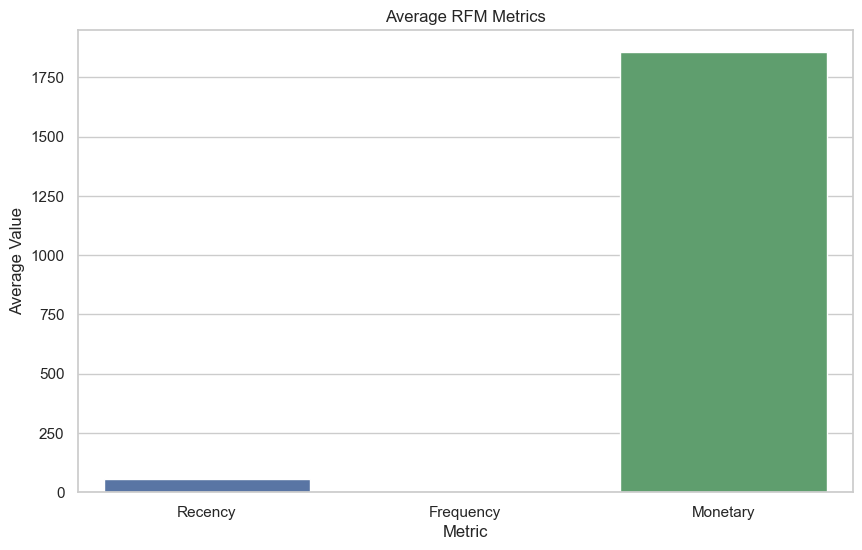

In [424]:
# Bar Chart of Average RFM Metrics

average_rfm = rfm_table[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
average_rfm.columns = ['Metric', 'Average Value']

plt.figure(figsize=(10, 6))
sns.barplot(data=average_rfm, x='Metric', y='Average Value')
plt.title('Average RFM Metrics')
plt.ylabel('Average Value')
plt.show()

In [425]:
# Merge demographic data

demographics = df[['CustomerID', 'Age', 'CustGender']].drop_duplicates()
rfm_table = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID').merge(demographics, on='CustomerID')

# Check the resulting DataFrame
print(rfm_table)

        CustomerID  Recency   index  Frequency  Monetary  Age CustGender
0         C1010011       26       0          2    5106.0   24          F
1         C1010011       26       0          2    5106.0   33          M
2         C1010012       69       1          1    1499.0   22          M
3         C1010014       76       2          2    1455.0   24          F
4         C1010014       76       2          2    1455.0   32          M
...            ...      ...     ...        ...       ...  ...        ...
1034046   C9099836       76  878758          1     691.0   26          M
1034047   C9099877       37  878759          1     222.0   20          M
1034048   C9099919       65  878760          1     126.0   23          M
1034049   C9099941       55  878761          1      50.0   21          M
1034050   C9099956       27  878762          1     855.0   34          M

[1034051 rows x 7 columns]


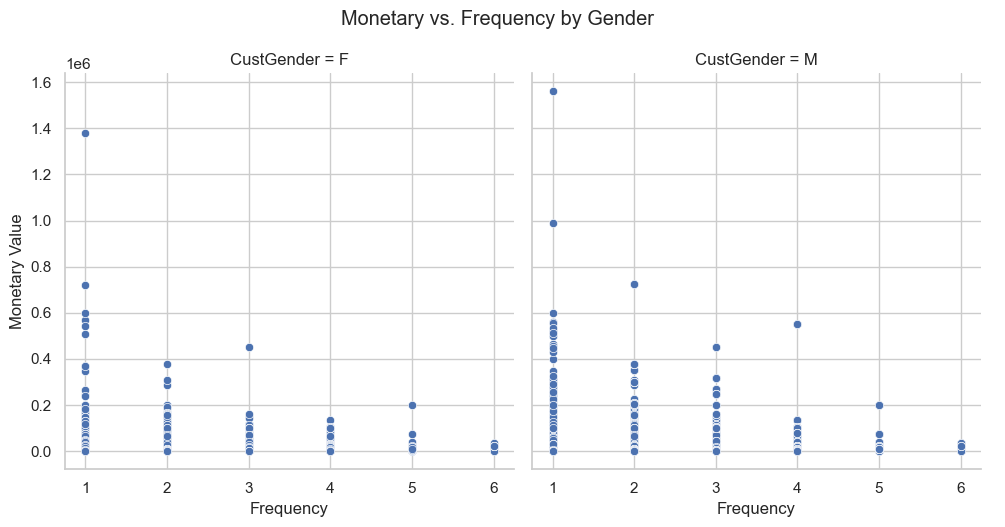

In [426]:
# Facet Grid of Monetary vs. Frequency by Gender

g = sns.FacetGrid(rfm_table, col = 'CustGender', height = 5, aspect = 1)
g.map(sns.scatterplot, 'Frequency', 'Monetary', color='b')
g.add_legend()
g.set_axis_labels('Frequency', 'Monetary Value')
g.fig.suptitle('Monetary vs. Frequency by Gender', y=1.05)
plt.show()

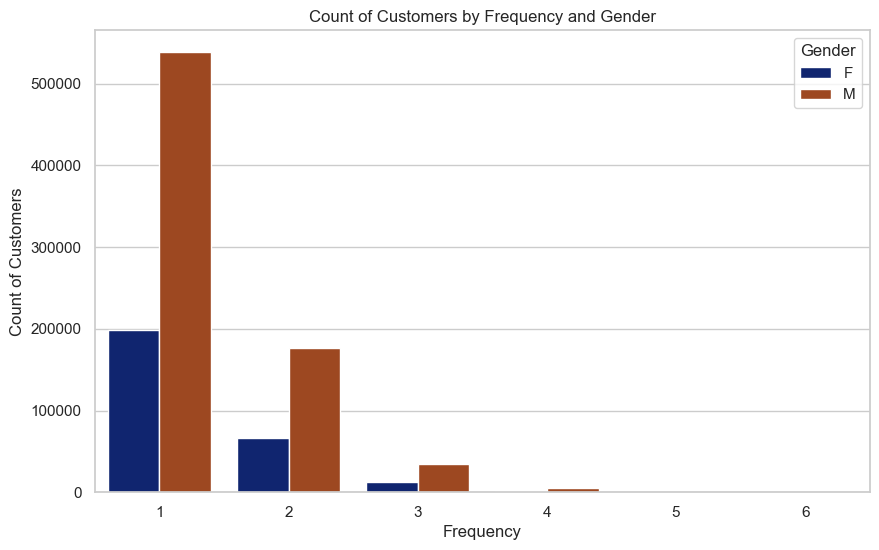

In [427]:
# Count Plot of Frequency by Gender

plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_table, x='Frequency', hue='CustGender', palette='dark')
plt.title('Count of Customers by Frequency and Gender')
plt.xlabel('Frequency')
plt.ylabel('Count of Customers')
plt.legend(title='Gender')
plt.show()

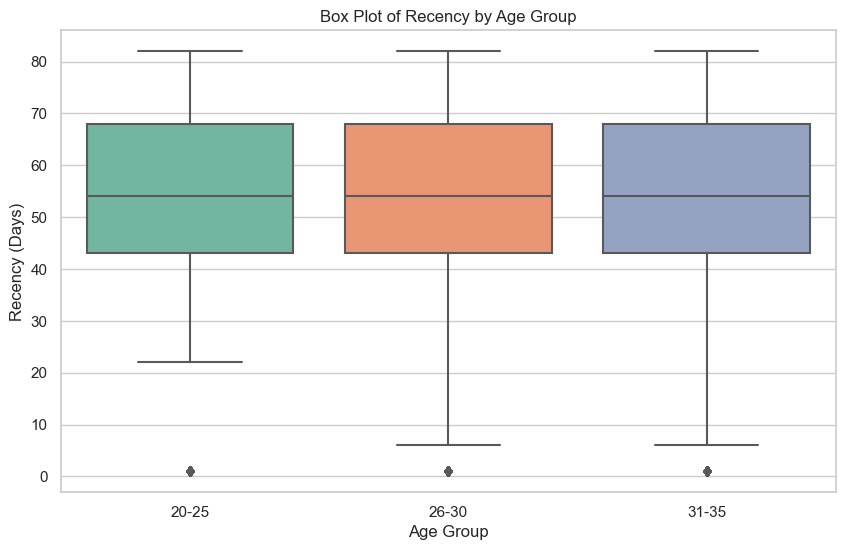

In [428]:
# Create Age Groups

bins = [20, 25, 30, 35]
labels = ['20-25', '26-30', '31-35']
rfm_table['AgeGroup'] = pd.cut(rfm_table['Age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm_table, x='AgeGroup', y='Recency', palette='Set2')
plt.title('Box Plot of Recency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Recency (Days)')
plt.show()

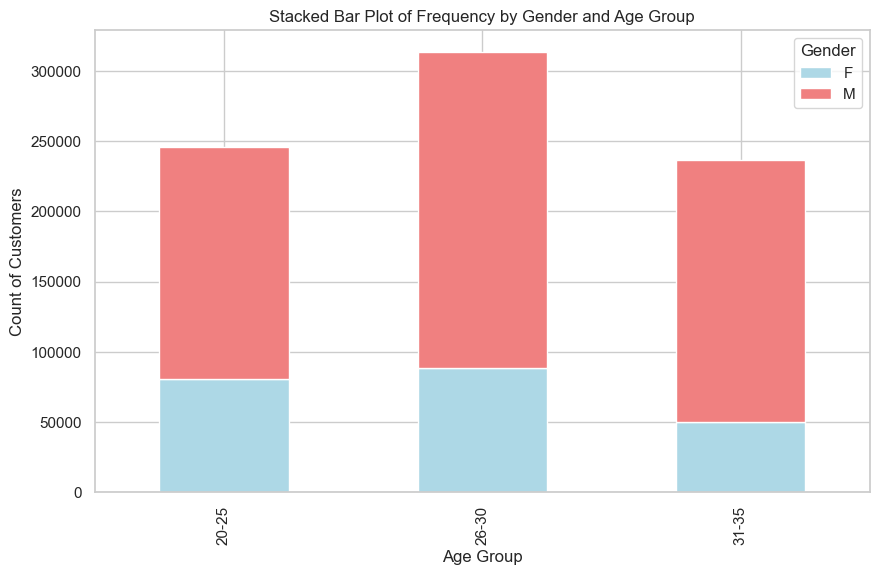

In [429]:
#  stacked bar plot of frequency by gender and age group
plt.figure(figsize=(10, 6))
age_counts = rfm_table.groupby(['AgeGroup', 'CustGender']).size().unstack()
age_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())

plt.title('Stacked Bar Plot of Frequency by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Customers')
plt.legend(title='Gender', labels=age_counts.columns)
plt.show()

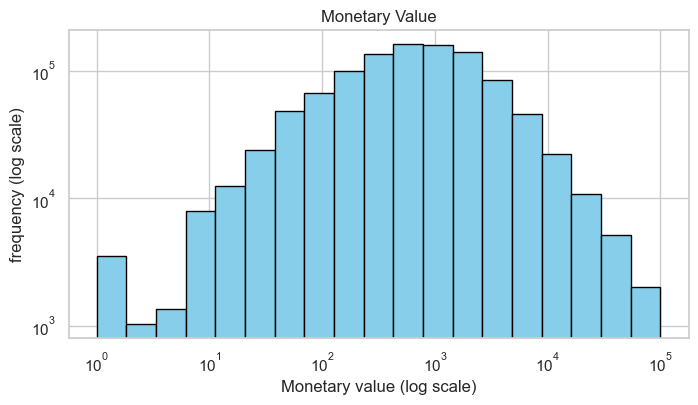

In [460]:
plt.figure(figsize = (8,4))
plt.hist(rfm_table['Monetary'], bins = np.logspace(0,5,20), color = 'skyblue', edgecolor = 'black')
plt.title('Monetary Value')
plt.xlabel('Monetary value (log scale)')
plt.ylabel('frequency (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Assigning each customer an RFM Score ##

In [431]:
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,Year,Month
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,1994,10
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,1957,4
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,1996,11


In [432]:
rfm_table.head(3)

,CustomerID,Recency,index,Frequency,Monetary,Age,CustGender,AgeGroup
0,C1010011,26,0,2,5106.0,24,F,20-25
1,C1010011,26,0,2,5106.0,33,M,31-35
2,C1010012,69,1,1,1499.0,22,M,20-25


In [433]:
# Calculating the quantile for each column

quantile = rfm_table[['Recency', 'Frequency', 'Monetary']].quantile(q = [0.25, 0.5, 0.75]).to_dict()
quantile

{'Recency': {0.25: 43.0, 0.5: 54.0, 0.75: 68.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 225.0, 0.5: 650.0, 0.75: 1790.0}}

In [434]:
rfm_table['Frequency'].value_counts()

1    736989
2    242323
3     47691
4      6313
5       661
6        74
Name: Frequency, dtype: int64

In [435]:
def assign_R_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 4
    elif x <= quantile[feature][0.5]:
        return 3
    elif x <= quantile[feature][0.75]:
        return 2
    else:
        return 1

In [436]:
def assign_M_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 1
    elif x <= quantile[feature][0.5]:
        return 2
    elif x <= quantile[feature][0.75]:
        return 3
    else:
        return 4

In [437]:
def custom_frequency_score(x):
    if x <= 3:
        return x
    else:
        return 4

In [438]:
rfm_table['R_score'] = rfm_table['Recency'].apply(lambda x: assign_R_score(x, 'Recency'))
rfm_table['F_score'] = rfm_table['Frequency'].apply(custom_frequency_score)
rfm_table['M_score'] = rfm_table['Monetary'].apply(lambda x: assign_R_score(x, 'Monetary'))

In [439]:
rfm_table.head(3)

,CustomerID,Recency,index,Frequency,Monetary,Age,CustGender,AgeGroup,R_score,F_score,M_score
0,C1010011,26,0,2,5106.0,24,F,20-25,4,2,1
1,C1010011,26,0,2,5106.0,33,M,31-35,4,2,1
2,C1010012,69,1,1,1499.0,22,M,20-25,1,1,2


In [440]:
# Summing RFM scores

rfm_table['Summed_RFM_Scores'] = rfm_table[['R_score', 'F_score', 'M_score']].sum(axis = 1)
rfm_table.head(3)

,CustomerID,Recency,index,Frequency,Monetary,Age,CustGender,AgeGroup,R_score,F_score,M_score,Summed_RFM_Scores
0,C1010011,26,0,2,5106.0,24,F,20-25,4,2,1,7
1,C1010011,26,0,2,5106.0,33,M,31-35,4,2,1,7
2,C1010012,69,1,1,1499.0,22,M,20-25,1,1,2,4


In [441]:
rfm_table['RFM_group'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str) + rfm_table['M_score'].astype(str) 
rfm_table.head(3)

,CustomerID,Recency,index,Frequency,Monetary,Age,CustGender,AgeGroup,R_score,F_score,M_score,Summed_RFM_Scores,RFM_group
0,C1010011,26,0,2,5106.0,24,F,20-25,4,2,1,7,421
1,C1010011,26,0,2,5106.0,33,M,31-35,4,2,1,7,421
2,C1010012,69,1,1,1499.0,22,M,20-25,1,1,2,4,112


<AxesSubplot:xlabel='Summed_RFM_Scores', ylabel='count'>

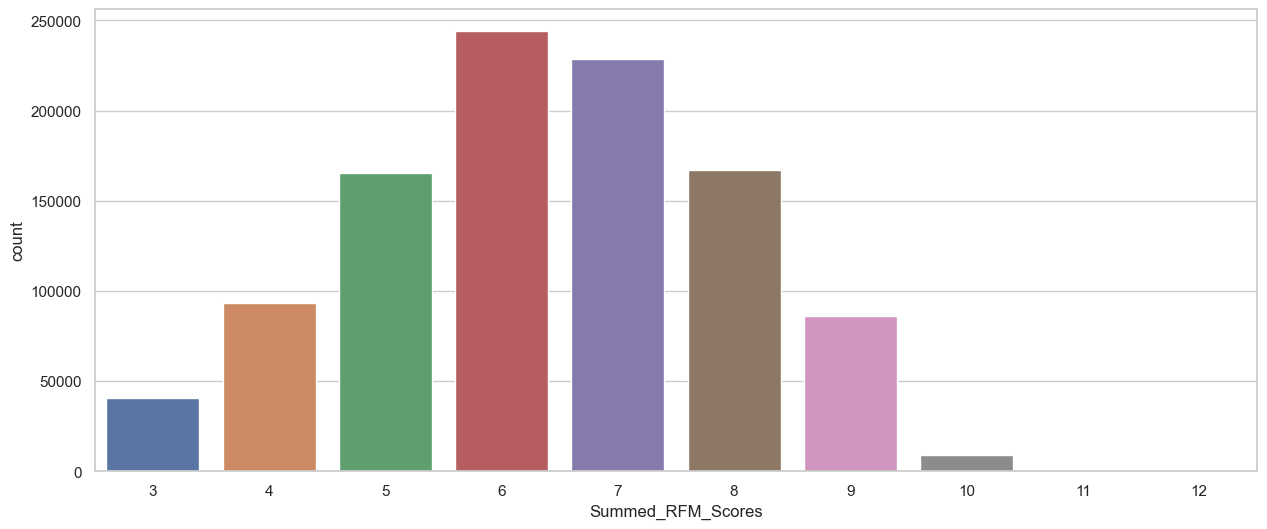

In [452]:
# visualization of RFM Score

plt.figure(figsize = (15, 6))
sns.countplot(x = rfm_table['Summed_RFM_Scores'])

#### Setting the threshold as  12 -10 for high valued customers, 9 - 6 as medium valued customers, 5 - 3 as low valued customers ####

In [443]:
def assign_segments(x):
    if x <= 5:
        return 'Low'
    elif x <= 9:
        return 'Medium'
    else:
        return 'High'

In [444]:
rfm_table['Segments'] = rfm_table['Summed_RFM_Scores'].apply(lambda x: assign_segments(x))
rfm_table.head(4)

,CustomerID,Recency,index,Frequency,Monetary,Age,CustGender,AgeGroup,R_score,F_score,M_score,Summed_RFM_Scores,RFM_group,Segments
0,C1010011,26,0,2,5106.0,24,F,20-25,4,2,1,7,421,Medium
1,C1010011,26,0,2,5106.0,33,M,31-35,4,2,1,7,421,Medium
2,C1010012,69,1,1,1499.0,22,M,20-25,1,1,2,4,112,Low
3,C1010014,76,2,2,1455.0,24,F,20-25,1,2,2,5,122,Low


#### Weighted Score of RFM Score ####

In [445]:
rfm_table['Weighted_Score'] = (rfm_table['R_score'] * 2) + (rfm_table['F_score'] * 1) +  (rfm_table['M_score'] * 1)
rfm_table.head(3)

,CustomerID,Recency,index,Frequency,Monetary,Age,CustGender,AgeGroup,R_score,F_score,M_score,Summed_RFM_Scores,RFM_group,Segments,Weighted_Score
0,C1010011,26,0,2,5106.0,24,F,20-25,4,2,1,7,421,Medium,11
1,C1010011,26,0,2,5106.0,33,M,31-35,4,2,1,7,421,Medium,11
2,C1010012,69,1,1,1499.0,22,M,20-25,1,1,2,4,112,Low,5


<AxesSubplot:xlabel='Weighted_Score', ylabel='count'>

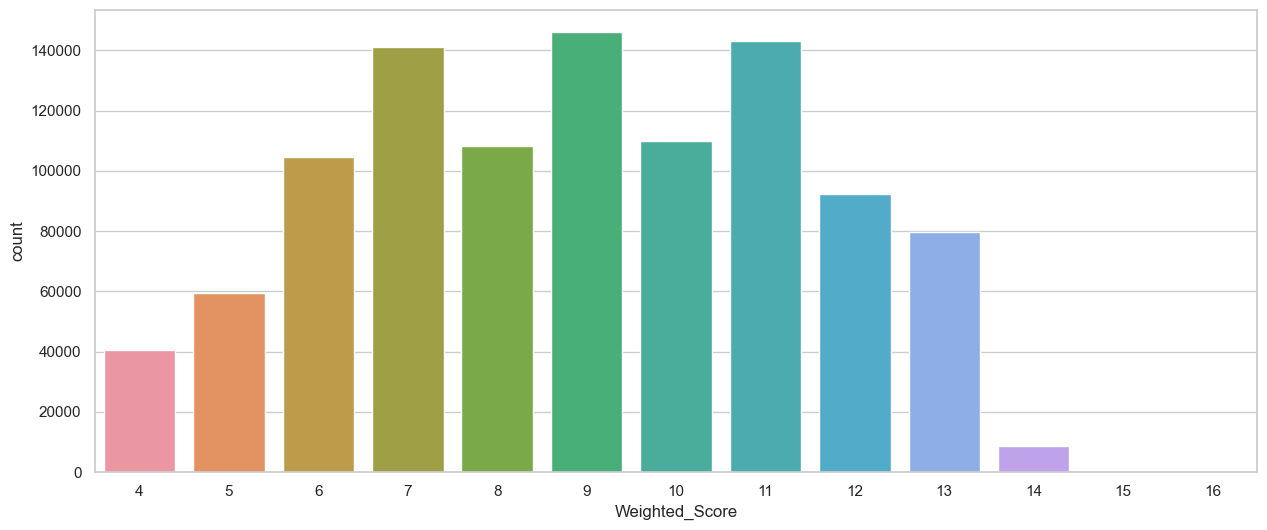

In [451]:
# visualization of Weighted_Score

plt.figure(figsize = (15, 6))
sns.countplot(x = rfm_table['Weighted_Score'])

In [448]:
rfm_table['Weighted_Segments'] = rfm_table['Weighted_Score'].apply(lambda x: assign_segments(x))
rfm_table.head(4)

,CustomerID,Recency,index,Frequency,Monetary,Age,CustGender,AgeGroup,R_score,F_score,M_score,Summed_RFM_Scores,RFM_group,Segments,Weighted_Score,Weighted_Segments
0,C1010011,26,0,2,5106.0,24,F,20-25,4,2,1,7,421,Medium,11,High
1,C1010011,26,0,2,5106.0,33,M,31-35,4,2,1,7,421,Medium,11,High
2,C1010012,69,1,1,1499.0,22,M,20-25,1,1,2,4,112,Low,5,Low
3,C1010014,76,2,2,1455.0,24,F,20-25,1,2,2,5,122,Low,6,Medium


<AxesSubplot:xlabel='Weighted_Segments', ylabel='count'>

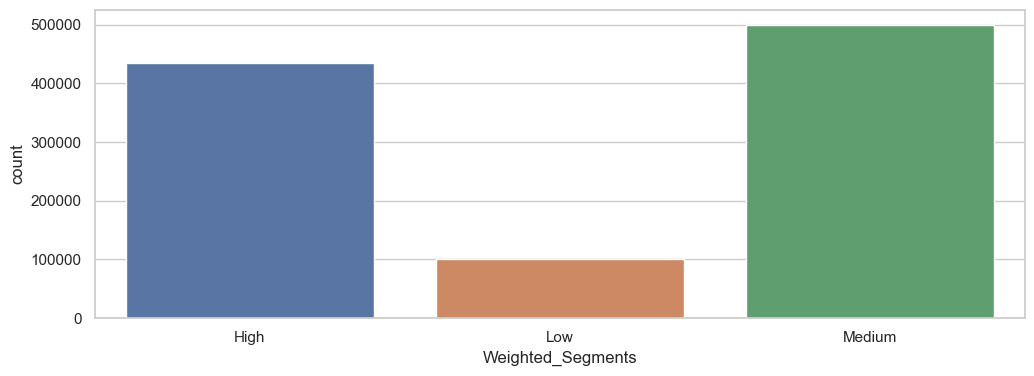

In [464]:
# visualization of Weighted_Segments

plt.figure(figsize = (12, 4))
sns.countplot(x = rfm_table['Weighted_Segments'])

## Using K-means Clustering ##

In [447]:
# K-Means Clustering
# kmeans = KMeans(n_clusters=3)
# rfm_table['Cluster'] = kmeans.fit_predict(rfm_table[['Recency', 'Frequency', 'Monetary']])

In [468]:
pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00


In [471]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA